<a href="https://colab.research.google.com/github/Thanhnhat1211/Bai-Tap-AI/blob/main/FuzzyLogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=3b82ac7ea2ada6cf344d0e61751d9d7e26402abcf296d7c5bd163ae9d3587651
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz


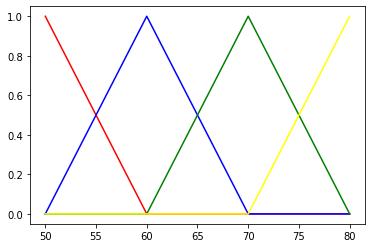

In [ ]:
import matplotlib.pyplot as plt
x=np.arange(50,81,1)
slow=fuzz.trimf(x,[50,50,60])
medium=fuzz.trimf(x,[50,60,70])
medium_fast=fuzz.trimf(x,[60,70,80])
full_speed=fuzz.trimf(x,[70,80,80])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'b',linewidth=1.5,label='medium')
plt.plot(x,medium_fast,'green',linewidth=1.5,label='medium_fast')
plt.plot(x,full_speed,'yellow',linewidth=1.5,label='full_speed')

In [ ]:
import matplotlib.pyplot as plt
x=np.arange(50,81,1)
slow=fuzz.trapmf(x,[0,0,50,60])
medium=fuzz.trapmf(x,[50,60,70,80])
medium_fast=fuzz.trapmf(x,[60,70,80,0])
full_speed=fuzz.trapmf(x,[70,80,0,0])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'b',linewidth=1.5,label='medium')
plt.plot(x,medium_fast,'green',linewidth=1.5,label='medium_fast')
plt.plot(x,full_speed,'yellow',linewidth=1.5,label='full_speed')

AssertionError: ignored

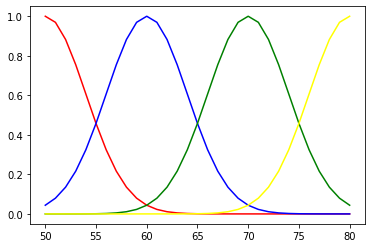

In [ ]:
 import matplotlib.pyplot as plt
x=np.arange(50,81,1)
slow=fuzz.gaussmf(x,50,4)
medium=fuzz.gaussmf(x,60,4)
medium_fast=fuzz.gaussmf(x,70,4)
full_speed=fuzz.gaussmf(x,80,4)
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'b',linewidth=1.5,label='medium')
plt.plot(x,medium_fast,'green',linewidth=1.5,label='medium_fast')
plt.plot(x,full_speed,'yellow',linewidth=1.5,label='full_speed')

25.0


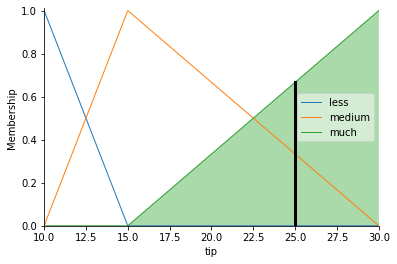

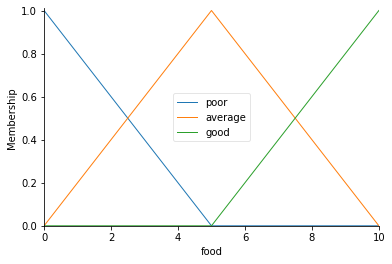

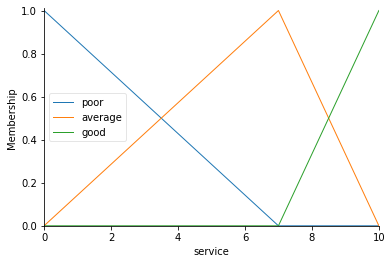

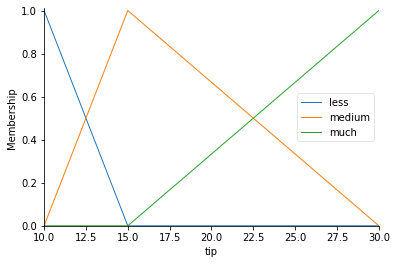

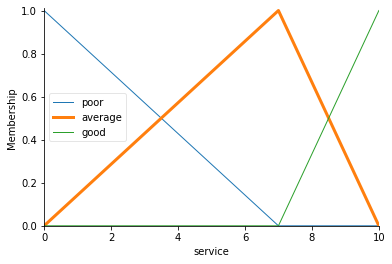

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food=ctrl.Antecedent(np.arange(0,11,1),'food')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(10,31,1),'tip')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])
service['poor']=fuzz.trimf(service.universe,[0,0,7])
service['average']=fuzz.trimf(service.universe,[0,7,10])
service['good']=fuzz.trimf(service.universe,[7,10,10])
tip['less']=fuzz.trimf(tip.universe,[10,10,15])
tip['medium']=fuzz.trimf(tip.universe,[10,15,30])
tip['much']=fuzz.trimf(tip.universe,[15,30,30])
rule1=ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2=ctrl.Rule(food['average']&service['poor'],tip['much'])
rule3=ctrl.Rule(food['good']&service['poor'],tip['much'])
rule4=ctrl.Rule(food['poor']&service['average'],tip['much'])
rule5=ctrl.Rule(food['average']&service['average'],tip['much'])
rule6=ctrl.Rule(food['good']&service['average'],tip['much'])
rule7=ctrl.Rule(food['poor']&service['good'],tip['much'])
rule8=ctrl.Rule(food['average']&service['good'],tip['much'])
rule9=ctrl.Rule(food['good']&service['good'],tip['much'])
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=10
tipping.input['service']=10
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

food.view()
service.view()
tip.view()
service['average'].view()

38.90434049726082


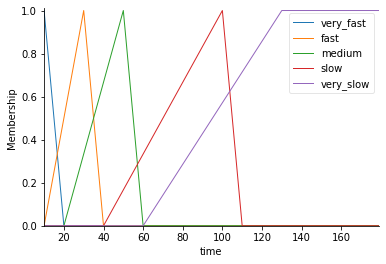

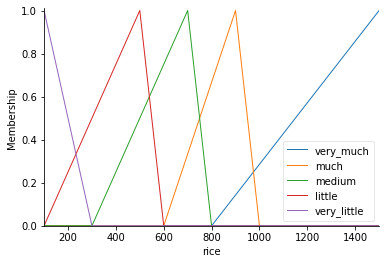

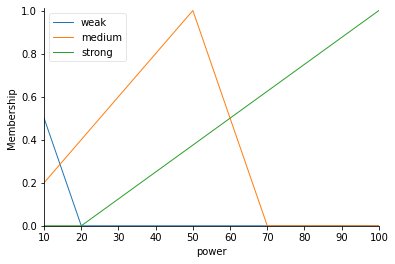

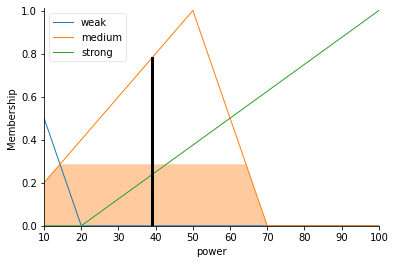

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time=ctrl.Antecedent(np.arange(10,180,1),'time')
time['very_fast']=fuzz.trimf(time.universe,[10,10,20])
time['fast']=fuzz.trimf(time.universe,[10,30,40])
time['medium']=fuzz.trimf(time.universe,[20,50,60])
time['slow']=fuzz.trimf(time.universe,[40,100,110])
time['very_slow']=fuzz.trapmf(time.universe,[60,130,180,180])
time.view()
rice=ctrl.Antecedent(np.arange(100,1500,1),'rice')
rice['very_much']=fuzz.trimf(rice.universe,[800,1500,1500])
rice['much']=fuzz.trimf(rice.universe,[600,900,1000])
rice['medium']=fuzz.trimf(rice.universe,[300,700,800])
rice['little']=fuzz.trimf(rice.universe,[100,500,600])
rice['very_little']=fuzz.trimf(rice.universe,[100,100,300])
rice.view()
power=ctrl.Consequent(np.arange(10,101,1),'power')
power['weak']=fuzz.trimf(power.universe,[0,0,20])
power['medium']=fuzz.trimf(power.universe,[0,50,70])
power['strong']=fuzz.trimf(power.universe,[20,100,100])
power.view()
rule1=ctrl.Rule(rice['very_little']&time['very_slow'],power['weak'])
rule2=ctrl.Rule(rice['very_little']&time['slow'],power['weak'])
rule3=ctrl.Rule(rice['very_little']&time['medium'],power['weak'])
rule4=ctrl.Rule(rice['very_little']&time['fast'],power['weak'])
rule5=ctrl.Rule(rice['very_little']&time['very_fast'],power['weak'])
rule6=ctrl.Rule(rice['little']&time['very_slow'],power['weak'])
rule7=ctrl.Rule(rice['little']&time['slow'],power['weak'])
rule8=ctrl.Rule(rice['little']&time['medium'],power['weak'])
rule9=ctrl.Rule(rice['little']&time['fast'],power['weak'])
rule10=ctrl.Rule(rice['little']&time['very_fast'],power['weak'])
rule11=ctrl.Rule(rice['medium']&time['very_slow'],power['weak'])
rule12=ctrl.Rule(rice['medium']&time['slow'],power['medium'])
rule13=ctrl.Rule(rice['medium']&time['medium'],power['medium'])
rule14=ctrl.Rule(rice['medium']&time['fast'],power['medium'])
rule15=ctrl.Rule(rice['medium']&time['very_fast'],power['strong'])
rule16=ctrl.Rule(rice['much']&time['very_slow'],power['medium'])
rule17=ctrl.Rule(rice['much']&time['slow'],power['medium'])
rule18=ctrl.Rule(rice['much']&time['medium'],power['medium'])
rule19=ctrl.Rule(rice['much']&time['fast'],power['strong'])
rule20=ctrl.Rule(rice['much']&time['very_fast'],power['strong'])
rule21=ctrl.Rule(rice['very_much']&time['very_slow'],power['medium'])
rule22=ctrl.Rule(rice['very_much']&time['slow'],power['strong'])
rule23=ctrl.Rule(rice['very_much']&time['medium'],power['strong'])
rule24=ctrl.Rule(rice['very_much']&time['fast'],power['strong'])
rule25=ctrl.Rule(rice['very_much']&time['very_fast'],power['strong'])
powering_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering=ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['rice']=1000
powering.input['time']=150
powering.compute()
print(powering.output['power'])
power.view(sim=powering)